<h1>BELGIO

Confronto dei dati relativi ai decessi registrati da EUROSTAT e i decessi causa COVID-19 registrati con i decessi previsti dal modello predittivo SARIMA.

<h2>DECESSI TOTALI MENSILI BELGIO</h2>

Il DataFrame contiene i dati relativi ai decessi mensili della regione <b>Belgio</b> dal <b>2015</b> al <b>30 settembre 2020</b>.

In [1]:
import matplotlib.pyplot as plt

import pandas as pd
decessi_tot = pd.read_csv('../../csv/nazioni/serie_storica_be.csv')
decessi_tot.head()

,TIME,GEO,Value
0,2015-01-05,Belgium,2461
1,2015-01-12,Belgium,2525
2,2015-01-19,Belgium,2526
3,2015-01-26,Belgium,2510
4,2015-02-02,Belgium,2644


In [2]:
decessi_tot['TIME'] = pd.to_datetime(decessi_tot['TIME'])
decessi_tot.Value = pd.to_numeric(decessi_tot.Value)


<h3>Recupero dei dati inerenti al periodo COVID-19</h3>

In [3]:
decessi_tot = decessi_tot[decessi_tot['TIME'] > '2020-02-29']
decessi_tot.head()

,TIME,GEO,Value
269,2020-03-02,Belgium,2237
270,2020-03-09,Belgium,2212
271,2020-03-16,Belgium,2224
272,2020-03-23,Belgium,2550
273,2020-03-30,Belgium,3186


<h3>Creazione serie storica dei decessi totali</h3>

In [4]:
decessi_tot = decessi_tot.set_index('TIME')
decessi_tot = decessi_tot.groupby(pd.Grouper(freq='M')).sum()
decessi_tot = decessi_tot.Value
decessi_tot.head()

TIME
2020-03-31    12409
2020-04-30    15034
2020-05-31     8903
2020-06-30     9434
2020-07-31     7083
Freq: M, Name: Value, dtype: int64

<h2>DECESSI COVID REGISTRATI IN BELGIO</h2>

Il DataFrame contine i dati relativi ai decessi per covid-19 registrati in <b>Belgio</b> da <b> marzo 2020</b> al <b>30 settembre 2020</b>.

In [5]:
covid = pd.read_csv('../../csv/decessi_covid/serie_storica_decessi_covid_be.csv')
covid.head()

,Unnamed: 0,Date,Value
0,0,2020-01-27,0.0
1,1,2020-02-03,0.0
2,2,2020-02-10,0.0
3,3,2020-02-17,0.0
4,4,2020-02-24,0.0


In [6]:
covid['Date'] = pd.to_datetime(covid['Date'])
covid.Value = pd.to_numeric(covid.Value)

In [7]:
covid = covid[covid['Date'] > '2020-02-29']
covid.head()

,Unnamed: 0,Date,Value
5,5,2020-03-02,0.0
6,6,2020-03-09,0.0
7,7,2020-03-16,4.0
8,8,2020-03-23,71.0
9,9,2020-03-30,356.0


In [8]:
covid = covid.set_index('Date')
covid = covid.groupby(pd.Grouper(freq='M')).sum()
covid

,Unnamed: 0,Value
Date,,
2020-03-31,35,431.0
2020-04-30,46,6663.0
2020-05-31,62,2186.0
2020-06-30,100,452.0
2020-07-31,98,89.0
2020-08-31,145,73.0
2020-09-30,134,86.0


<h3>Creazione serie storica dei decessi COVID-19</h3>

In [9]:
covid = covid.Value
covid.head()

Date
2020-03-31     431.0
2020-04-30    6663.0
2020-05-31    2186.0
2020-06-30     452.0
2020-07-31      89.0
Freq: M, Name: Value, dtype: float64

<h2>PREDIZIONE DECESSI MODELLO SARIMA</h2>

Il DataFrame contiene i dati riguardanti i decessi registrati in <b>Belgio</b> secondo la predizione del modello SARIMA applicato. 

In [12]:
predictions = pd.read_csv('../../csv/pred/predictions_SARIMA_be.csv')
predictions.head()

,Unnamed: 0,predicted_mean
0,2015-01-31,0.000000
1,2015-02-28,9804.763371
2,2015-03-31,10449.021945
3,2015-04-30,11002.009153
4,2015-05-31,10346.193574


In [13]:
predictions.rename(columns={'Unnamed: 0': 'Data', 'predicted_mean':'Totale'}, inplace=True)
predictions.head()

,Data,Totale
0,2015-01-31,0.000000
1,2015-02-28,9804.763371
2,2015-03-31,10449.021945
3,2015-04-30,11002.009153
4,2015-05-31,10346.193574


In [14]:
predictions['Data'] = pd.to_datetime(predictions['Data'])
predictions.Totale = pd.to_numeric(predictions.Totale)

<h3>Recupero dei dati inerenti al periodo COVID-19</h3>

In [15]:
predictions = predictions[predictions['Data'] > '2020-02-29']
predictions.head()

,Data,Totale
62,2020-03-31,10609.135064
63,2020-04-30,9470.518899
64,2020-05-31,8433.836191
65,2020-06-30,9329.893604
66,2020-07-31,7974.559757


In [16]:
predictions = predictions.set_index('Data')
predictions.head()

,Totale
Data,
2020-03-31,10609.135064
2020-04-30,9470.518899
2020-05-31,8433.836191
2020-06-30,9329.893604
2020-07-31,7974.559757


<h3>Creazione serie storica dei decessi secondo la predizione del modello</h3>

In [17]:
predictions = predictions.Totale

<h1>INTERVALLI DI CONFIDENZA </h1>

<h3>Limite massimo

In [18]:
upper = pd.read_csv('../../csv/upper/predictions_SARIMA_be_upper.csv')
upper.head()

,Unnamed: 0,upper Value
0,2015-01-31,16676.971243
1,2015-02-28,13258.229658
2,2015-03-31,13533.856648
3,2015-04-30,13882.577357
4,2015-05-31,13218.734388


In [19]:
upper.rename(columns={'Unnamed: 0': 'Data', 'upper Value':'Totale'}, inplace=True)
upper['Data'] = pd.to_datetime(upper['Data'])
upper.Totale = pd.to_numeric(upper.Totale)
upper.head()

,Data,Totale
0,2015-01-31,16676.971243
1,2015-02-28,13258.229658
2,2015-03-31,13533.856648
3,2015-04-30,13882.577357
4,2015-05-31,13218.734388


In [20]:
upper = upper[upper['Data'] > '2020-02-29']
upper = upper.set_index('Data')
upper.head()

,Totale
Data,
2020-03-31,12734.048348
2020-04-30,11595.668779
2020-05-31,10556.741691
2020-06-30,11453.546350
2020-07-31,10098.723307


In [21]:
upper = upper.Totale

<h3>Limite minimo

In [22]:
lower = pd.read_csv('../../csv/lower/predictions_SARIMA_be_lower.csv')
lower.head()

,Unnamed: 0,lower Value
0,2015-01-31,-16676.971243
1,2015-02-28,6351.297084
2,2015-03-31,7364.187242
3,2015-04-30,8121.440948
4,2015-05-31,7473.652760


In [23]:
lower.rename(columns={'Unnamed: 0': 'Data', 'lower Value':'Totale'}, inplace=True)
lower['Data'] = pd.to_datetime(lower['Data'])
lower.Totale = pd.to_numeric(lower.Totale)
lower.head()

,Data,Totale
0,2015-01-31,-16676.971243
1,2015-02-28,6351.297084
2,2015-03-31,7364.187242
3,2015-04-30,8121.440948
4,2015-05-31,7473.652760


In [24]:
lower = lower[lower['Data'] > '2020-02-29']
lower = lower.set_index('Data')
lower.head()

,Totale
Data,
2020-03-31,8484.221780
2020-04-30,7345.369018
2020-05-31,6310.930692
2020-06-30,7206.240858
2020-07-31,5850.396207


In [25]:
lower = lower.Totale

<h1> CONFRONTO DELLE SERIE STORICHE </h1>

Di seguito il confronto grafico tra le serie storiche dei <b>decessi totali</b>, dei <b>decessi causa COVID-19</b> e dei <b>decessi previsti dal modello SARIMA</b> registrati in <b>Belgio</b>.
<br />
I mesi di riferimento sono: <b>marzo</b>, <b>aprile</b>, <b>maggio</b>, <b>giugno</b>, <b>luglio</b>, <b>agosto</b> e <b>settembre</b>.

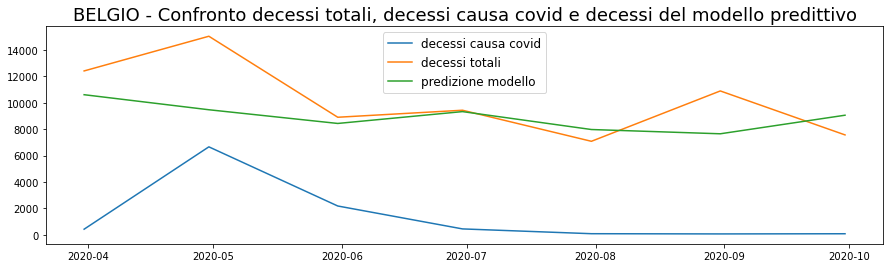

In [26]:
plt.figure(figsize=(15,4))
plt.title('BELGIO - Confronto decessi totali, decessi causa covid e decessi del modello predittivo', size=18)
plt.plot(covid, label='decessi causa covid')
plt.plot(decessi_tot, label='decessi totali')
plt.plot(predictions, label='predizione modello')
plt.legend(prop={'size': 12})
plt.show()

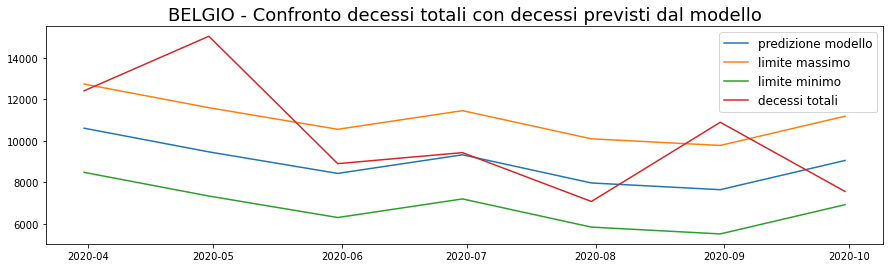

In [27]:
plt.figure(figsize=(15,4))
plt.title("BELGIO - Confronto decessi totali con decessi previsti dal modello", size=18)
plt.plot(predictions, label='predizione modello')
plt.plot(upper, label='limite massimo')
plt.plot(lower, label='limite minimo')
plt.plot(decessi_tot, label='decessi totali')
plt.legend(prop={'size': 12})
plt.show()

<h3>Calcolo dei decessi COVID-19 secondo il modello predittivo</h3>

Differenza tra i decessi totali e i decessi secondo la previsione del modello SARIMA.

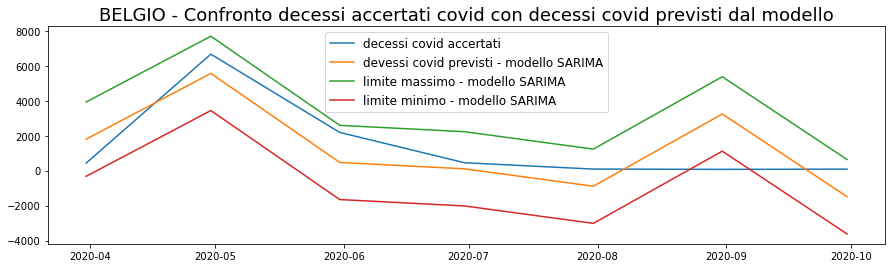

In [29]:
n = decessi_tot - predictions
n_upper = decessi_tot - lower
n_lower = decessi_tot - upper

plt.figure(figsize=(15,4))
plt.title("BELGIO - Confronto decessi accertati covid con decessi covid previsti dal modello", size=18)
plt.plot(covid, label='decessi covid accertati')
plt.plot(n, label='devessi covid previsti - modello SARIMA')
plt.plot(n_upper, label='limite massimo - modello SARIMA')
plt.plot(n_lower, label='limite minimo - modello SARIMA')
plt.legend(prop={'size': 12})
plt.show()

Gli <b>intervalli</b> corrispondono alla differenza tra i decessi totali per i mesi di marzo, aprile, maggio, giugno, luglio e settembre 2020 e i valori degli <b>intervalli di confidenza</b> (intervallo superiore e intervallo inferiore) del modello predittivo SARIMA dei medesimi mesi.

<h3>Numero totale dei decessi accertati COVID-19 registrati in Belgio</h3>

In [30]:
m = covid.sum()
print(int(m))

9980


<h3>Numero totale dei decessi COVID-19 previsti dal modello per il Belgio </h3>

<h4>Valore medio

In [31]:
total = n.sum()
print(int(total))

8796


<h4>Valore massimo

In [32]:
total_upper = n_upper.sum()
print(int(total_upper))

23674


<h4>Valore minimo

In [33]:
total_lower = n_lower.sum()
print(int(total_lower))

-6081


<h3>Calcolo del numero dei decessi COVID-19 non registrati secondo il modello predittivo SARIMA in Belgio</h3>

<h4>Valore medio

In [34]:
x = decessi_tot - predictions - covid
x = x.sum()
print(int(x))

-1183


<h4>Valore massimo

In [35]:
x_upper = decessi_tot - lower - covid
x_upper = x_upper.sum()
print(int(x_upper))

13694


<h4>Valore minimo

In [36]:
x_lower = decessi_tot - upper - covid
x_lower = x_lower.sum()
print(int(x_lower))

-16061
